In [60]:
import numpy as np

width = 20
height = 20
sim_output = np.zeros((6, width, height, 3))

for time_step in range(1, 6):
    with open(f"0.{time_step}/U") as f:
        line = f.readline()
        data_in = False
        index = 0
        while line:
            if line == "(\n":
                data_in = True
            elif line == ")\n":
                data_in = False
            line = f.readline()
            if data_in and len(line.split(" ")) == 3:
                x, y, z = line.split(" ")
                u_x = float(x[1:])
                u_y = float(y)
                u_z = float(z.split(")")[0])
                
                sim_output[time_step][height-int(index / height)-1][index % width] = [u_x, u_y, u_z]
                
                index += 1

In [93]:
sim_output[5,:,:,0].shape

(20, 20)

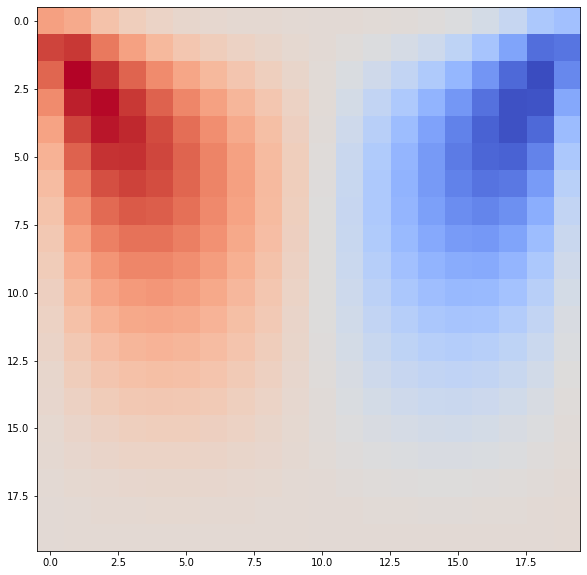

In [133]:
f, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor='w')

ax.imshow(sim_output[5,:,:,1], cmap="coolwarm")

Text(0.5, 1.0, 'Y-Component')

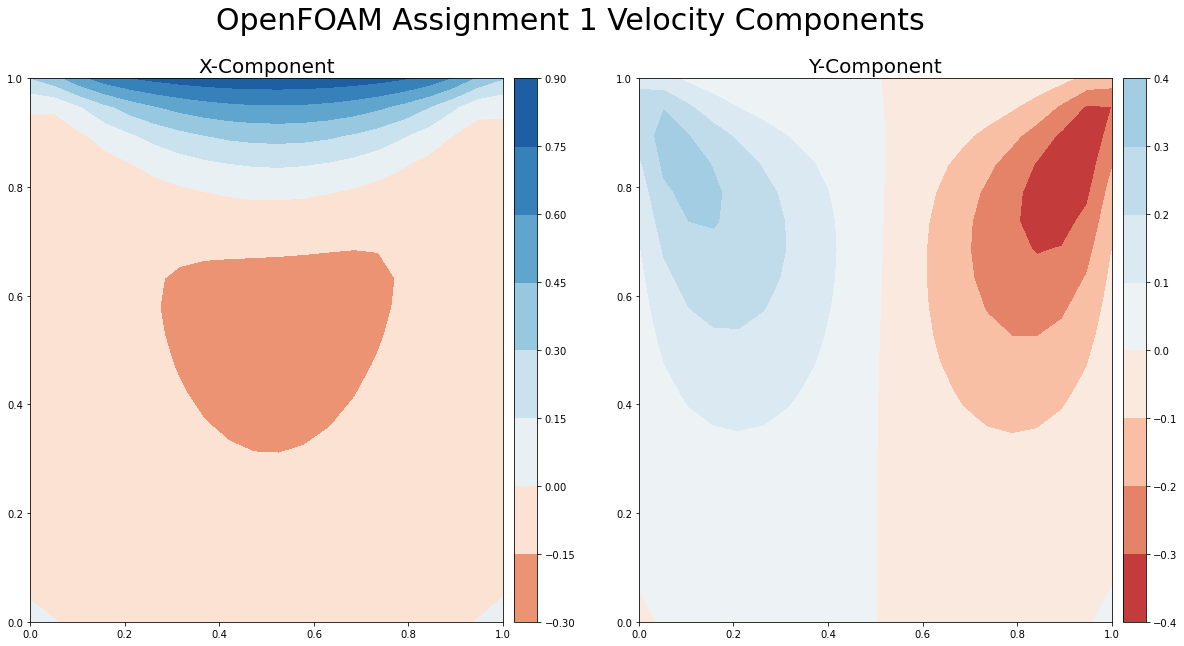

In [154]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors



f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), facecolor='w')
f.suptitle(f"OpenFOAM Assignment 1 Velocity Components", fontsize=30)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.15)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.15)

xx, yy = np.meshgrid(np.linspace(0,1,20), np.linspace(1,0,20))

vmax = 1
vmin = -0.5
contour1 = ax1.contourf(xx, yy, sim_output[5,:,:,0], cmap='RdBu', norm=colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax), vmin=vmin, vmax=vmax)
f.colorbar(contour1, cax=cax1, orientation='vertical')

contour2 = ax2.contourf(xx, yy, sim_output[5,:,:,1], cmap='RdBu', norm=colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax), vmin=vmin, vmax=vmax)
f.colorbar(contour2, cax=cax2, orientation='vertical')

ax1.set_title("X-Component", fontsize=20)
ax2.set_title("Y-Component", fontsize=20)

In [20]:
(9/125)+(1/3)

0.4053333333333333